In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import warnings as warn
from warnings import filterwarnings
filterwarnings("ignore")



In [2]:
# read  dataset
data = pd.read_csv('D:\Minor_python\data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#to know the total null values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#id should be unique so check dublicates
data['id'].duplicated().sum()

0

In [6]:
#since "Unnamed col" all input values are missing so drop it 
#  drop id column because its a unique identifier number
data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
#take a copy from the dataframe
dataa=data.copy()
#drop diagnosis col. as i want to check outliers and this col type id object
dataa.drop(['diagnosis'], axis = 1 , inplace=True)

<Axes: >

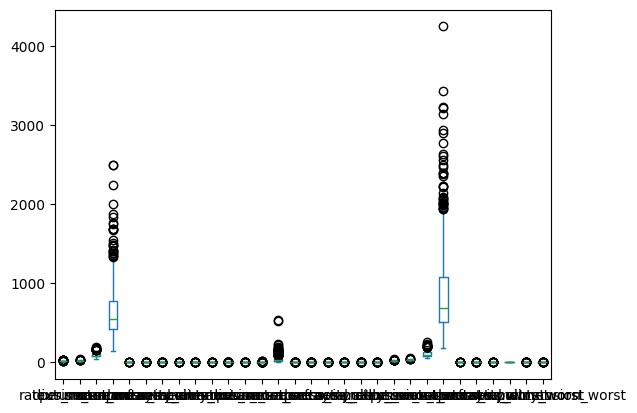

In [7]:
#dealing with outliners

data.plot(kind='box')

<Axes: >

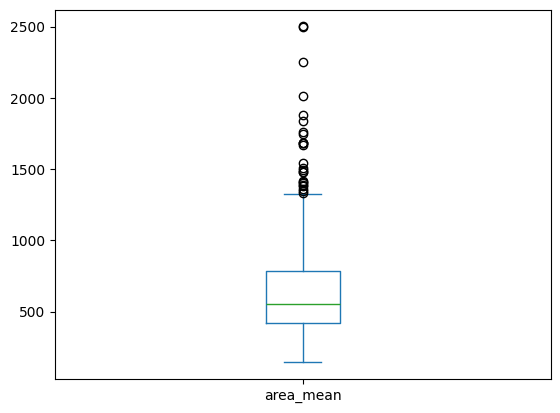

In [8]:
data['area_mean'].plot(kind='box')

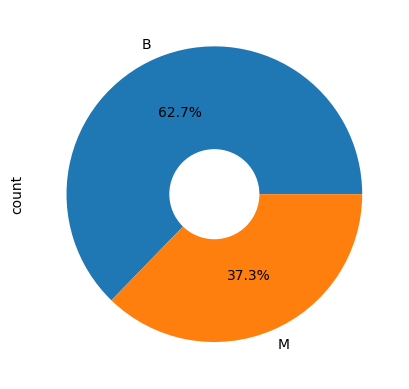

In [9]:
# visualize it usung pie chart
data['diagnosis'].value_counts().plot(kind='pie',autopct='%.1f%%')
circle = plt.Circle((0,0), 0.3, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
plt.show()

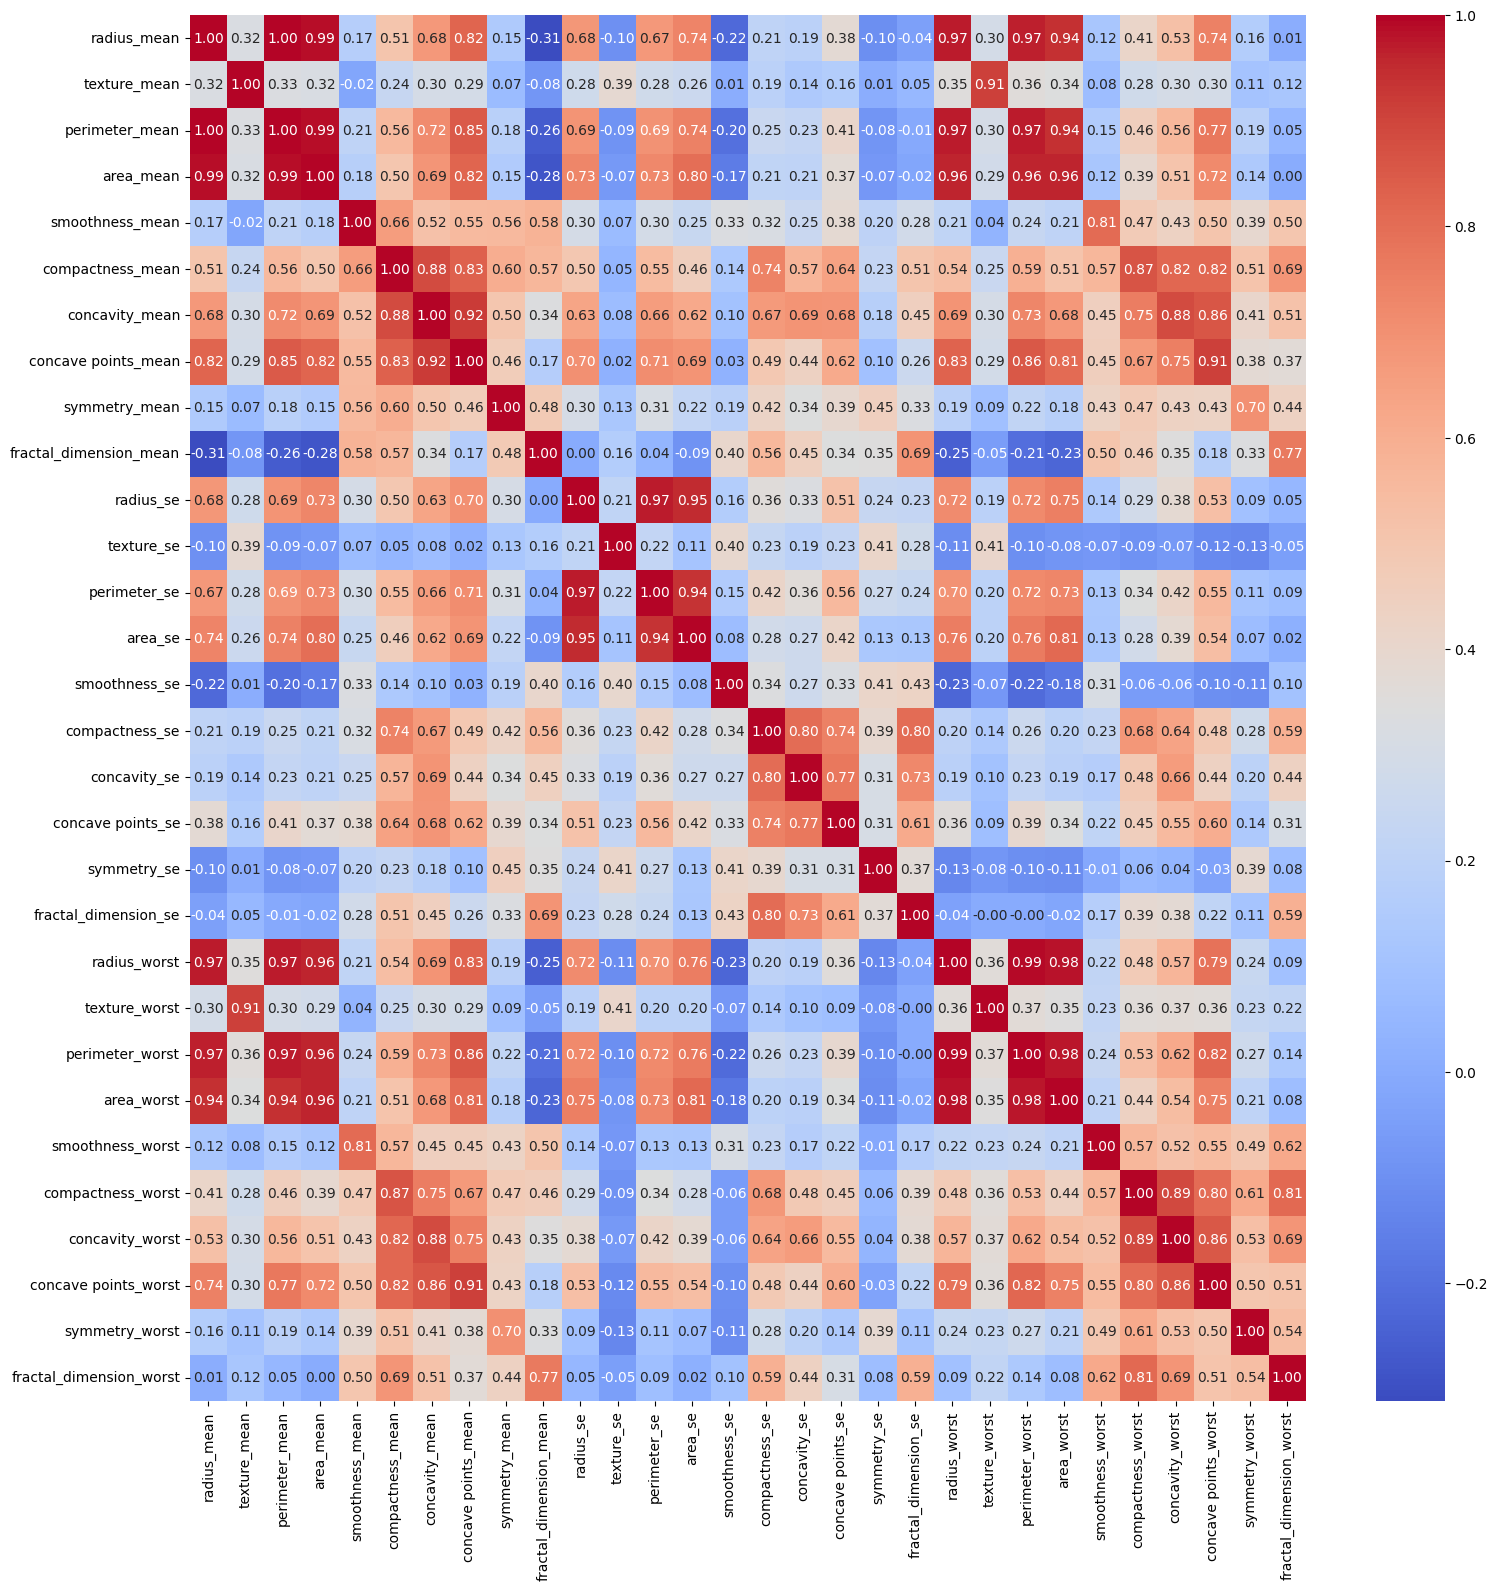

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [11]:
import plotly.graph_objects as go
import plotly.io as pio


diagnosis_distribution = data['diagnosis'].value_counts().reset_index()
diagnosis_distribution.columns = ['Diagnosis', 'Count']

# Assigning colors to each diagnosis category
colors = {'M': 'darkred', 'B': 'steelblue'}

fig = go.Figure()

# Add bars for each diagnosis category
for index, row in diagnosis_distribution.iterrows():
    fig.add_trace(go.Bar(x=[row['Diagnosis']], y=[row['Count']], 
                         marker_color=colors[row['Diagnosis']], 
                         name=row['Diagnosis']))

# Customize the layout
fig.update_layout(title='Distribution of Malignant (M) and Benign (B) Diagnoses',
                  xaxis_title='Diagnosis', yaxis_title='Count',
                  showlegend=False,  # Hide legend for better aesthetics
                  bargap=0.05)  # Adjust gap between bars

# Display the plot


#fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'steelblue'}, 'name': 'B', 'type': 'bar', 'x': ['B'], 'y': [357]},
             {'marker': {'color': 'darkred'}, 'name': 'M', 'type': 'bar', 'x': ['M'], 'y': [212]}],
    'layout': {'bargap': 0.05,
               'showlegend': False,
               'template': '...',
               'title': {'text': 'Distribution of Malignant (M) and Benign (B) Diagnoses'},
               'xaxis': {'title': {'text': 'Diagnosis'}},
               'yaxis': {'title': {'text': 'Count'}}}
})

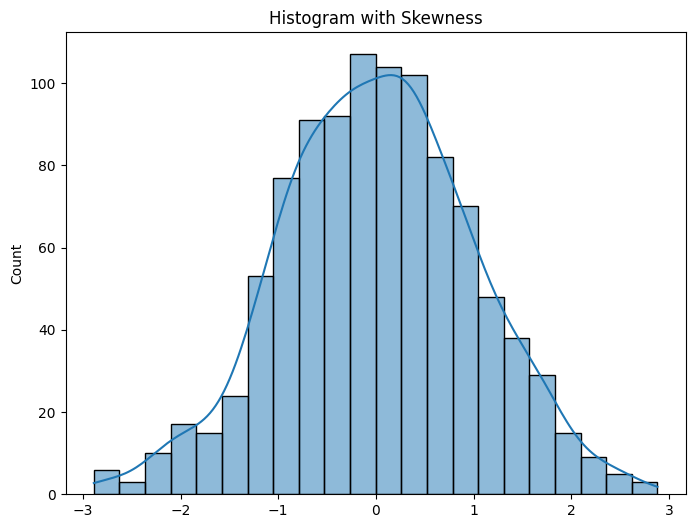

In [12]:
#Histogram to test skewness
data = pd.Series(np.random.normal(0, 1, 1000))
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True)
plt.title('Histogram with Skewness')
plt.show()

In [13]:
num_features = data.drop('diagnosis', axis=1)

plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_features.columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(num_features[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

ValueError: No axis named 1 for object type Series